In [4]:
import scipy.io as sio
import numpy as np
import csv
import matplotlib.pyplot as plt
from graph import *
from utils import *
from AStar import *

dataFolder = "data/"

### load data from csv file
# X, Y


#[X, Y] = grid_generator([0, 4500], [0, 3000], 10) # 45km x 30km grid, 10m resolution [0,0] top left

# landmarks coordinates
Xlm = np.loadtxt(dataFolder +"Xlm.csv")
Ylm = np.loadtxt(dataFolder +"Ylm.csv")
pos_lm = np.array([Xlm, Ylm]).T

In [5]:

# create list of landmark nodes
landmark_nodes = []
for i in range(len(Xlm)):
    landmark_nodes.append(Node(pos_lm[i]))


# Xvec, Yvec, [0, 0] on bottom left
X = np.arange(0, 45000, 10) # 45km x 30km grid, 10m resolution [0,0] bottom left
Y = np.arange(0, 30000, 10)[::-1] # Mi serve reversato?


# map and obstacle map
mars_map = np.loadtxt(dataFolder +"map.csv", delimiter=",")
obstacle_map = np.loadtxt(dataFolder +"obstacle.csv", delimiter=",")

## Constants of the problem

maxVel = 0.5; # [m/s] maximum velocity of the rover 
LAxis = 1; # [m] length of the rover wheel axis
###

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/home/meoli/Coding/Magistrale/Robotics/Robotic-pathfinding/.venv/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_3421/244598759.py", line 22, in <module>
    path = Astar(node0, node_target, obstacle_map)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/meoli/Coding/Magistrale/Robotics/Robotic-pathfinding/AStar.py", line 66, in Astar
IndexError: index -4501 is out of bounds for axis 0 with size 4500

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/meoli/Coding/Magistrale/Robotics/Robotic-pathfinding/.venv/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 2144, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/meoli/Coding/Magistrale/Robotics/Rob

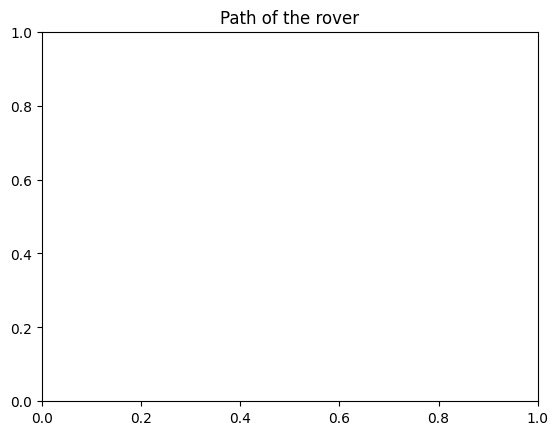

In [9]:
### TASK 1 ###

# Initial and target position need to be coordinates in the grid
P0 = np.array([42.38*10**3, 11.59*10**3, 90])  # initial position, [m, m, deg]
[j0, i0] = coord2ij(P0[0], P0[1], X[0], Y[0])
P_target = np.array([33.07*10**3, 19.01*10**3, 180])  # target position, [m, m, deg]
[j_target, i_target] = coord2ij(P_target[0], P_target[1], X[0], Y[0])

# Initial and target nodes in the grid
P0 = np.array([X[i0], Y[j0], P0[2]])  # initial position, [m, m, deg]
P_target = np.array([X[i_target], Y[j_target], P_target[2]])  # target position, [m, m, deg]

# Initial and target nodes
node0 = Node(P0)
node_target = Node(P_target)

## 1.1) Plot the trajectory of the rover in the map
plt.figure(1)
plt.title("Path of the rover")

# Create path with A*
path = Astar(node0, node_target, obstacle_map)
# Plot path
path_coords = [(node.pos[0], node.pos[1]) for node in path]
for i in range(len(path_coords)-1):
    plt.plot([path_coords[i][0], path_coords[i+1][0]], [path_coords[i][1], path_coords[i+1][1]], 'r')

plt.imshow(mars_map, cmap='gray', origin='lower')

# 1.2) Plot the velocity profile of the rover
# 1.3) Plot the steering angle profile of the rover
# 1.4) Plot the rate of change of the steering angle profile of the rover


In [ ]:
### TASK 2 ###
